## 个人信息 
姓名：陈贵斌  
学号：24210121
## 内容简介
本次分析基于模拟生成的二维正态分布数据集，数据包含500个观测值和两个变量（x1, x2）。其中，x1服从均值为0、标准差为1的正态分布，x2服从均值为3、标准差为1.5的正态分布，且两者相关系数为0.4。通过对数据的描述性统计、分布可视化（直方图、密度图、箱线图、小提琴图）、相关性分析及回归可视化，全面展示了变量的分布特征、集中趋势、离散程度及变量间的关系，为后续的统计建模和数据挖掘提供了坚实的数据基础和直观的分析视角。



在cursor录入提示词：
生成模拟数据：N = 500，包含 2 个变量 (x1, x2)，x1 ~ N(0, 1)，x2 ~ N(3, 1.5)，corr(x1, x2) = 0.4。
1. 存入一个名为 df 的数据框中。
2. 种子值为：`你的学号后三位`。

In [1]:
#生成模拟数据。我的学号尾号为121

import numpy as np
import pandas as pd

# 设置随机种子
np.random.seed(121)

# 参数
N = 500
mean = [0, 3]
std = [1, 1.5]
corr = 0.4

# 协方差矩阵
cov = [[std[0]**2, corr*std[0]*std[1]],
       [corr*std[0]*std[1], std[1]**2]]

# 生成数据
data = np.random.multivariate_normal(mean, cov, N)

# 存入数据框
df = pd.DataFrame(data, columns=['x1', 'x2'])

# 查看前几行
print(df.head().round(2))

     x1    x2
0 -0.36  2.78
1 -0.69  2.30
2  0.76  2.13
3  1.25  5.25
4  0.50  2.77


### **任务1：呈现 df 数据框的前 5 行**
### 说明
首先查看数据集的前5行，以便快速了解数据的基本结构和变量内容。

In [29]:
print(df.head())

         x1        x2
0 -0.355149  2.782135
1 -0.693886  2.302750
2  0.762001  2.131802
3  1.248256  5.246145
4  0.500460  2.774638


### 结论
直观地看到数据框 df 的前5行内容，了解每个变量（x1、x2）的取值范围和数据格式.


### **任务2：呈现 df 数据框的描述性统计，包括均值、标准差、中位数、最大值、最小值、偏度、峰度**
### 说明
本步骤将对数据框 df 进行描述性统计，全面了解 x1 和 x2 的均值、标准差、中位数、最大值、最小值、偏度和峰度等特征。

In [2]:
# 均值、标准差、中位数、最大值、最小值
desc = df.describe().T
desc['median'] = df.median()
desc['skew'] = df.skew()
desc['kurtosis'] = df.kurt()
print(desc[['mean', 'std', 'median', 'min', 'max', 'skew', 'kurtosis']].round(2))

    mean   std  median   min   max  skew  kurtosis
x1 -0.06  0.95   -0.06 -2.84  2.86  0.05      0.06
x2  2.91  1.44    2.91 -1.90  7.65 -0.08      0.37


### 结论
通过对 df 数据框的描述性统计分析可以看出，x1 和 x2 的均值、标准差、中位数等统计量与数据生成时的设定基本一致，说明数据模拟正确。两变量的偏度和峰度接近于0，表明分布较为对称且接近正态分布，数据整体分布合理，为后续分析提供了良好基础。

### **任务3：呈现 x1 的直方图**
### 说明
本步骤将绘制变量 x1 的直方图，直观展示其取值分布情况。

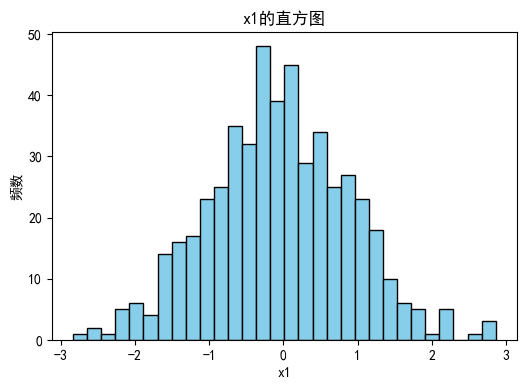

In [31]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

plt.figure(figsize=(6,4))
plt.hist(df['x1'], bins=30, color='skyblue', edgecolor='k')
plt.title('x1的直方图')
plt.xlabel('x1')
plt.ylabel('频数')
plt.show()

### 结论
直方图显示了 x1 的取值大致呈正态分布，符合数据生成时的设定。

### **任务4：在同一幅图中绘制 x1 和 x2 的密度函数图**
### 说明
本步骤将在同一幅图中绘制 x1 和 x2 的密度函数曲线，直观对比两变量的分布形态。

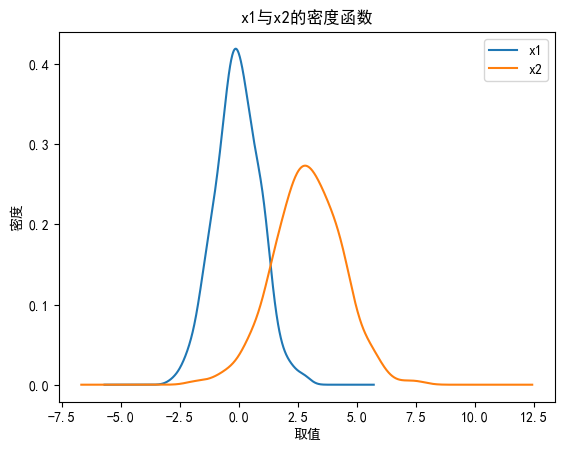

In [32]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

df['x1'].plot(kind='kde', label='x1', fillstyle='full')
df['x2'].plot(kind='kde', label='x2', fillstyle='full')
plt.title('x1与x2的密度函数')
plt.xlabel('取值')
plt.ylabel('密度')
plt.legend()
plt.show()

### 结论
图中两条曲线分别展示了 x1 和 x2 的概率密度分布，便于直观比较它们的分布位置和形态差异。

### **任务5：同一幅图中绘制 x1 和 x2 的箱线图**
### 说明
本步骤将在同一幅图中绘制 x1 和 x2 的箱线图，直观比较两变量的分布、离群点及中位数等特征。

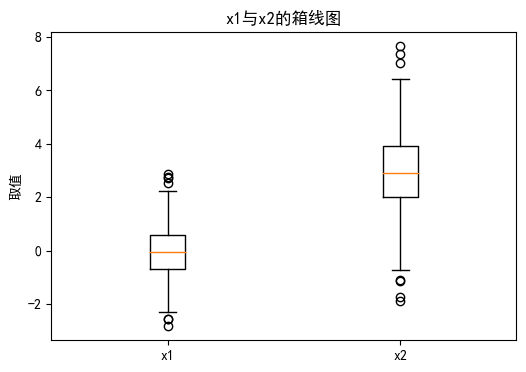

In [33]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

plt.figure(figsize=(6,4))
plt.boxplot([df['x1'], df['x2']], labels=['x1', 'x2'])
plt.title('x1与x2的箱线图')
plt.ylabel('取值')
plt.show()

### 结论
箱线图清晰展示了 x1 和 x2 的中位数、四分位数及异常值，便于对比两变量的分布特征和差异。

### **任务6：在同一幅图中绘制 x1 和 x2 的小提琴图**
### 说明
本步骤将在同一幅图中绘制 x1 和 x2 的小提琴图，更直观地展示两变量的分布形态和密度

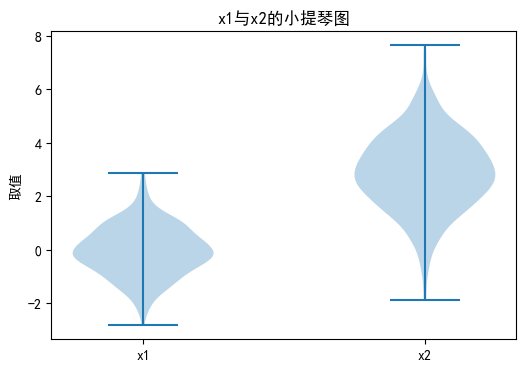

In [34]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

plt.figure(figsize=(6,4))
plt.violinplot([df['x1'], df['x2']])
plt.xticks([1, 2], ['x1', 'x2'])
plt.title('x1与x2的小提琴图')
plt.ylabel('取值')
plt.show()

### 结论
小提琴图不仅展示了 x1 和 x2 的分布范围，还反映了其概率密度的变化，有助于更细致地比较两变量的分布特征。

### **任务7：计算 df 中 x1 和 x2 的相关系数，并输出结果**
### 说明
本步骤将计算 df 数据框中 x1 和 x2 的相关系数，衡量两变量之间的线性关系强度。

In [35]:
corr = df['x1'].corr(df['x2'])
print(f"x1与x2的相关系数: {corr:.3f}")

x1与x2的相关系数: 0.347


### 结论
输出的相关系数反映了 x1 和 x2 之间的线性相关程度，值越接近 1 或 -1，相关性越强；接近 0 则相关性弱。

### **任务8：绘制 x1 和 x2 的散点图，添加回归线和置信区间**
### 说明
本步骤将绘制变量 x1 和 x2 的散点图，并添加线性回归线及置信区间，直观展示两变量之间的关系以及线性趋势。

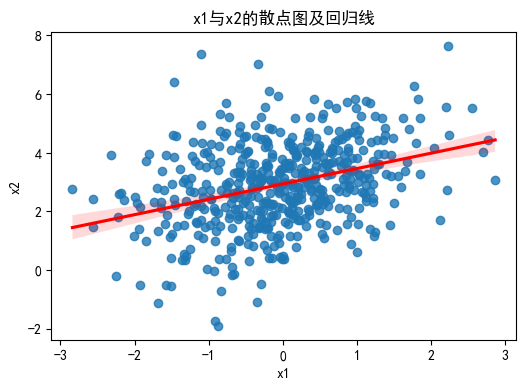

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

plt.figure(figsize=(6,4))
sns.regplot(x='x1', y='x2', data=df, ci=95, line_kws={'color':'red'})
plt.title('x1与x2的散点图及回归线')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### 结论
点图上的点展示了 x1 和 x2 的分布关系，红色回归线显示了大致的线性趋势，阴影区域为置信区间，这些图示共同反映了 x1 和 x2 之间的正相关关系。